# 1.Input the required libraries

In [2]:
# Data science libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import itertools

#Scikit-learn libraries
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve,auc

#Keras API Tensorflow 2 libraries
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU
from keras.layers import AlphaDropout
from keras.optimizers import Adam

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, LeakyReLU, AlphaDropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import get_custom_objects, to_categorical
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras import backend as K

from keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical

print('Tensorflow version:', tf.__version__)

Tensorflow version: 2.17.0


# 2.Load the dataset and preprocess the data

In [3]:
#loading dataset
df = np.load('/content/ORL_faces/ORL_faces.npz')

In [4]:
# Loading train and test dataset (data is already split into)
x_train = df['trainX']
y_train = df['trainY']
x_test = df['testX']
y_test = df['testY']

In [5]:
# Normalizing each image as each image is between 0-255 pixels
x_train = x_train.astype(np.float32) / 255.0
x_test = x_test.astype(np.float32) / 255.0

print('Training dataset shape: ',x_train.shape)
print('Testing dataset shape: ',x_test.shape)

Training dataset shape:  (240, 10304)
Testing dataset shape:  (160, 10304)


# 3.Split the dataset

In [6]:
#Scikit-learn libraries
from sklearn.model_selection import train_test_split
x_train, x_valid, y_train, y_valid = train_test_split(x_train,y_train,test_size=0.1,random_state=42)

# 4.Transform the images to equal sizes to feed in CNN

In [7]:
# Shape of image definition
rows = 112
columns = 92
image_shape = (rows,columns,1)

In [8]:
# Reshape function
x_train = x_train.reshape(x_train.shape[0],*image_shape)
x_test = x_test.reshape(x_test.shape[0],*image_shape)
x_valid = x_valid.reshape(x_valid.shape[0],*image_shape)

In [9]:
print('Training dataset modified shape: ',x_train.shape)
print('Testing dataset modified shape: ',x_test.shape)
print('Validating dataset modified shape: ',x_valid.shape)

Training dataset modified shape:  (216, 112, 92, 1)
Testing dataset modified shape:  (160, 112, 92, 1)
Validating dataset modified shape:  (24, 112, 92, 1)


**Visualize images in different colormap**

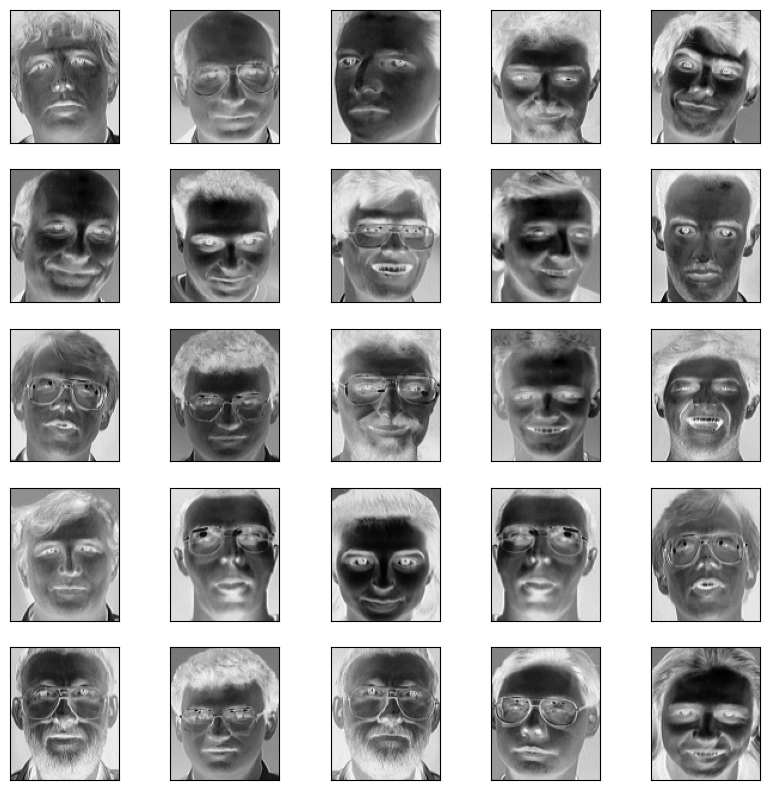

In [10]:
#visualize some inages 5 x 5 grid images in gray scale
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary) # for gray scale
plt.show()

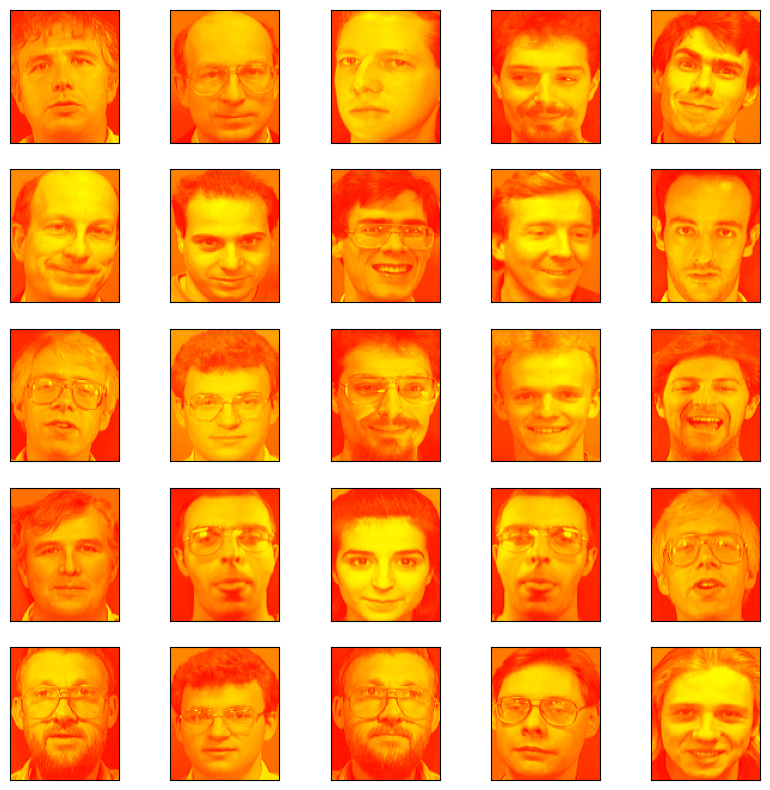

In [11]:
#visualize some inages 5 x 5 grid images in autumn
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i],cmap=plt.cm.autumn) # for autumn
plt.show()

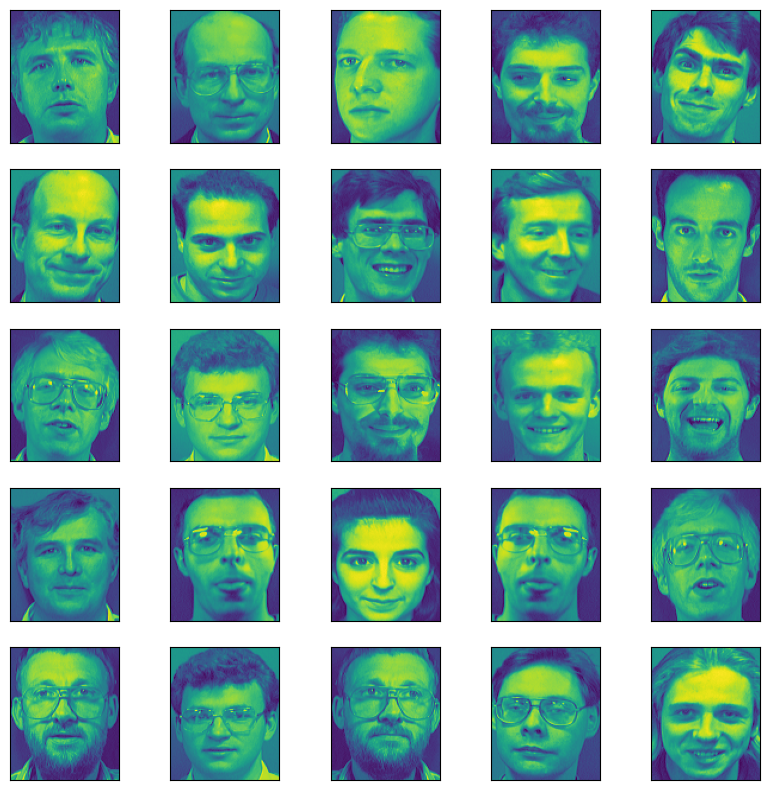

In [12]:
#visualize some inages 5 x 5 grid images by default
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i])
plt.show()

# 5.Build a CNN model that has 3 main layers

In [14]:
from keras.layers import LeakyReLU

def cnn_model(activation, dropout_rate, optimizer):
    model = Sequential()  # initialize Sequential model

    if activation == 'selu':
        model.add(Conv2D(32, kernel_size=3,
                         activation=activation,
                         input_shape=image_shape,
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Conv2D(64, 3, activation=activation,
                         kernel_initializer='lecun_normal'))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Flatten())
        model.add(Dense(2024, activation=activation,
                        kernel_initializer='lecun_normal'))
        model.add(Dropout(0.5))  # Changed to Dropout

        model.add(Dense(1024, activation=activation,
                        kernel_initializer='lecun_normal'))
        model.add(Dropout(0.5))  # Changed to Dropout

        model.add(Dense(512, activation=activation,
                        kernel_initializer='lecun_normal'))
        model.add(Dropout(0.5))  # Changed to Dropout

        model.add(Dense(20, activation='softmax'))  # Output layer

    elif activation == 'leaky-relu':
        model.add(Conv2D(32, kernel_size=3,
                         input_shape=image_shape))
        model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Conv2D(64, 3))
        model.add(LeakyReLU(alpha=0.2))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Flatten())
        model.add(Dense(2024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))

        model.add(Dense(1024))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))

        model.add(Dense(512))
        model.add(LeakyReLU(alpha=0.2))
        model.add(Dropout(0.5))

        model.add(Dense(20, activation='softmax'))  # Output layer

    else:
        model.add(Conv2D(32, kernel_size=3,
                         activation=activation,
                         input_shape=image_shape))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Conv2D(64, 3, activation=activation))
        model.add(MaxPooling2D(pool_size=2))

        model.add(Flatten())

        model.add(Dense(2024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(1024, activation=activation))
        model.add(Dropout(0.5))
        model.add(Dense(512, activation=activation))
        model.add(Dropout(0.5))

        model.add(Dense(20, activation='softmax'))  # Output layer

    model.compile(
        loss='sparse_categorical_crossentropy',
        optimizer=optimizer,
        metrics=['accuracy']
    )  # compile model with loss, optimizer chosen, and accuracy as metrics

    return model

# Defining the type of activation functions to be tested
activation_function = ['relu', 'elu', 'leaky-relu', 'selu']

activation_results = []  # creating an empty matrix for storing results for activations

for activation in activation_function:
    print('\nTraining with {0} activation function\n'.format(activation))

    model = cnn_model(activation=activation,
                      dropout_rate=0.2,
                      optimizer=Adam(clipvalue=0.5))  # using 'adam' optimizer with clipvalue of 0.5

    history = model.fit(np.array(x_train), np.array(y_train),
                        batch_size=512,
                        epochs=75,
                        verbose=2,
                        validation_data=(np.array(x_valid), np.array(y_valid)))

    activation_results.append(history)  # store results

    K.clear_session()
    del model

print(activation_results)



Training with relu activation function

Epoch 1/75
1/1 - 12s - 12s/step - accuracy: 0.0324 - loss: 3.0210 - val_accuracy: 0.0000e+00 - val_loss: 3.2925
Epoch 2/75
1/1 - 9s - 9s/step - accuracy: 0.0324 - loss: 4.2766 - val_accuracy: 0.0417 - val_loss: 2.9893
Epoch 3/75
1/1 - 8s - 8s/step - accuracy: 0.0509 - loss: 3.7769 - val_accuracy: 0.0417 - val_loss: 3.0331
Epoch 4/75
1/1 - 10s - 10s/step - accuracy: 0.0370 - loss: 3.3894 - val_accuracy: 0.0417 - val_loss: 3.0387
Epoch 5/75
1/1 - 12s - 12s/step - accuracy: 0.0463 - loss: 3.1003 - val_accuracy: 0.0417 - val_loss: 3.0196
Epoch 6/75
1/1 - 10s - 10s/step - accuracy: 0.0509 - loss: 3.0590 - val_accuracy: 0.0833 - val_loss: 3.0054
Epoch 7/75
1/1 - 8s - 8s/step - accuracy: 0.0602 - loss: 3.0349 - val_accuracy: 0.1250 - val_loss: 2.9965
Epoch 8/75
1/1 - 10s - 10s/step - accuracy: 0.0648 - loss: 2.9879 - val_accuracy: 0.1250 - val_loss: 2.9910
Epoch 9/75
1/1 - 12s - 12s/step - accuracy: 0.0509 - loss: 3.0009 - val_accuracy: 0.0833 - val_lo

In [15]:
# Lets try to plot the Model accuracy and Model loss for each activation function used above
# Just to make sure, we don't change the above data, so we store it in new matrix

activation_list = activation_function[0:]
results_new = activation_results[0:]

def plot_results(activation_results,activation_functions_new =[]):

    plt.figure(figsize=(8,6))

    # Model accuracy values plot
    for activation_function in activation_results:
        plt.plot(activation_function.history['val_accuracy'])

    plt.title('Model accuracy')
    plt.ylabel('Test Accuracy')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()

    # Model loss values plot

    plt.figure(figsize=(8,6))

    for activation_function in activation_results:
        plt.plot(activation_function.history['val_loss'])

    plt.title('Model Loss')
    plt.ylabel('Test Loss')
    plt.xlabel('No. of Epochs')
    plt.legend(activation_functions_new)
    plt.grid()
    plt.show()

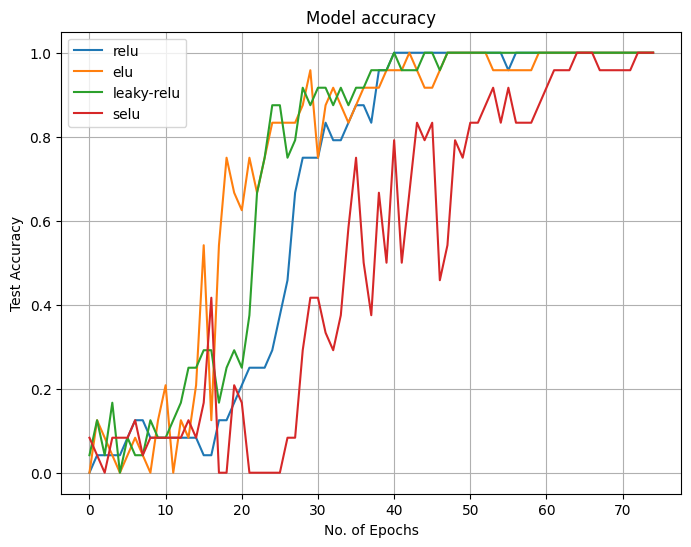

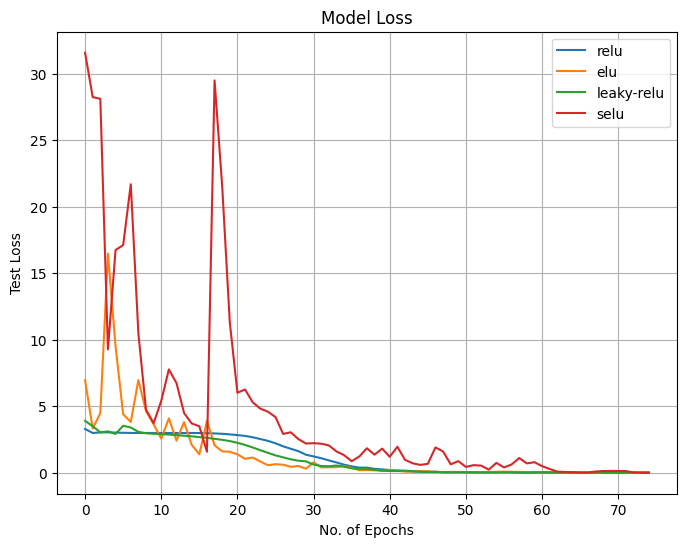

In [16]:
plot_results(results_new, activation_list)

Here it is seen that **'leaky-relu'** and **'relu'** both perform well with minimum loss at lower epochs as compared to other activation functions

Looking at the plots above all activation functions converge with minimum loss and high accuracy at training and validation set but **'leaky-relu'** is able to converge for higher accuracy at lower epochs with minimum loss, so we choose **'leaky-relu'** for final model training and plotting results.

In [17]:
activation_func_final ='leaky-relu'

model_final = cnn_model(activation=activation_func_final,
                    dropout_rate=0.2,
                    optimizer=Adam(clipvalue=0.5)) #using 'adam' optimizer with clipvalue of 0.5

history_final = model_final.fit(np.array(x_train), np.array(y_train),
                    batch_size=512,
                    epochs=75,
                    verbose=2,
                    validation_data=(np.array(x_valid),np.array(y_valid)))

Epoch 1/75
1/1 - 12s - 12s/step - accuracy: 0.0463 - loss: 3.0023 - val_accuracy: 0.0417 - val_loss: 3.8724
Epoch 2/75
1/1 - 8s - 8s/step - accuracy: 0.0370 - loss: 4.8530 - val_accuracy: 0.0000e+00 - val_loss: 3.5411
Epoch 3/75
1/1 - 10s - 10s/step - accuracy: 0.0370 - loss: 5.4570 - val_accuracy: 0.0000e+00 - val_loss: 3.1221
Epoch 4/75
1/1 - 12s - 12s/step - accuracy: 0.0787 - loss: 3.5502 - val_accuracy: 0.0000e+00 - val_loss: 3.0230
Epoch 5/75
1/1 - 10s - 10s/step - accuracy: 0.0694 - loss: 3.1481 - val_accuracy: 0.0000e+00 - val_loss: 3.0248
Epoch 6/75
1/1 - 7s - 7s/step - accuracy: 0.1111 - loss: 2.9642 - val_accuracy: 0.0000e+00 - val_loss: 3.1972
Epoch 7/75
1/1 - 11s - 11s/step - accuracy: 0.0694 - loss: 3.6633 - val_accuracy: 0.0833 - val_loss: 2.8565
Epoch 8/75
1/1 - 11s - 11s/step - accuracy: 0.1157 - loss: 2.8879 - val_accuracy: 0.1250 - val_loss: 2.8879
Epoch 9/75
1/1 - 9s - 9s/step - accuracy: 0.0972 - loss: 2.8832 - val_accuracy: 0.0000e+00 - val_loss: 2.9257
Epoch 10/7

In [18]:
result_score = model_final.evaluate(np.array(x_test),np.array(y_test),verbose=0)

print('Test Loss {:.4f}'.format(result_score[0]))
print('Test Accuracy {:.4f}'.format(result_score[1]))

Test Loss 0.4472
Test Accuracy 0.9375


dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])


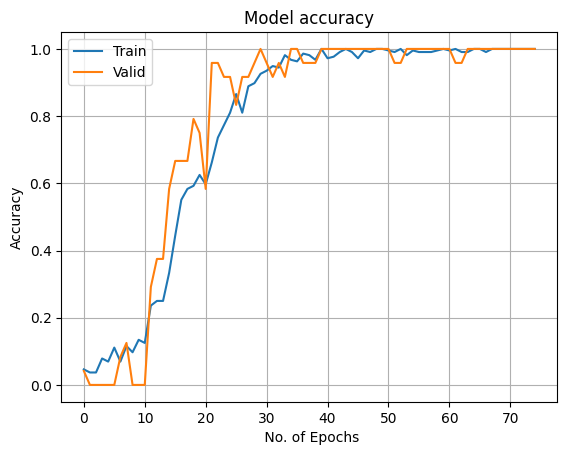

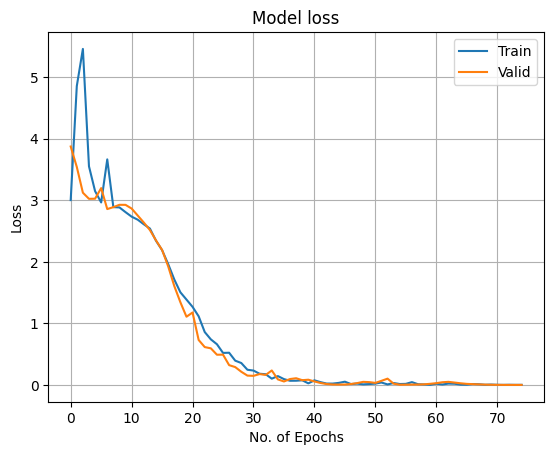

In [19]:
# Data in history

print(history_final.history.keys())

# Plotting Accuracy for final model
plt.plot(history_final.history['accuracy'])
plt.plot(history_final.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel(' No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

# Plotting Loss for Final Model
plt.plot(history_final.history['loss'])
plt.plot(history_final.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('No. of Epochs')
plt.legend(['Train', 'Valid'])
plt.grid()
plt.show()

## Conclusion
Here in this project we analyzed ORL faces images (train and test sets were given). We used CNN method to build the model and train it.

The analysis for different activation functions is fisrt observed to find that 'leaky-relu' activation function is one of the activation functions that can be used for out final model

The model training is done using x_train and y_train with validation data as x_valid and y_valid. owever for evaluating model, we use x_test and y_test which gives us **loss ~0.2435** with **an accuracy of 93.75%**